<a href="https://colab.research.google.com/github/nargyanti/IPCV_Genap_2022/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [79]:
def dilation(image, structure_element):      
  filtered_image = np.copy(image)  

  for x in range(image.shape[0]):
    for y in range(image.shape[1]): 
      for i in range(structure_element.shape[0]):
        for j in range(structure_element.shape[1]):
          if (structure_element[i, j] == 1 and image[x, y] == 255).all():
            new_x = x + i
            new_y = y + j
            filtered_image[new_x, new_y] = 255                      
  return filtered_image

In [80]:
def erotion(image, structure_element):      
  filtered_image = np.copy(image)
  radius = structure_element.shape[0] // 2

  for x in range(radius, image.shape[0]-radius):
    for y in range(radius, image.shape[1]-radius):            
      x_start = x - radius
      x_end = x + radius + 1
      y_start = y - radius
      y_end = y + radius + 1
      selection = np.copy(image[x_start:x_end, y_start:y_end])
      for i in range(structure_element.shape[0]):
        for j in range(structure_element.shape[1]):
          if(255 in selection): # if contains 255 in selection image
            if(structure_element[i,j] == 1 and selection[i,j] == 0).all(): # 0 if there are 1 matrix that contain 0
              filtered_image[x, y] = 0          
  return filtered_image

In [81]:
def opening(image, structure_element):   
  filtered_image = np.copy(image)   

  filtered_image = erotion(image, structure_element)
  filtered_image = dilation(filtered_image, structure_element)

  return filtered_image

In [82]:
def closing(image, structure_element):   
  filtered_image = np.copy(image)   

  filtered_image = dilation(image, structure_element)
  filtered_image = erotion(filtered_image, structure_element)

  return filtered_image

In [83]:
# Dilation using OpenCV
def dilation_opencv(image, structure_element):    
  dilation_image = cv2.dilate(image, structure_element,iterations = 1)                          
  return dilation_image

In [84]:
# Erotion using OpenCV
def erotion_opencv(image, structure_element):    
  erotion_image = cv2.erode(image, structure_element, iterations = 1)                        
  return erotion_image

In [85]:
# Opening using OpenCV
def opening_opencv(image, structure_element):
  opening_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, structure_element)
  return opening_image

In [86]:
# Closing using OpenCV
def closing_opencv(image, structure_element):
  closing_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, structure_element)
  return closing_image

In [87]:
# Import image
image = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

In [88]:
# Structure element
from skimage.io import imread, imshow
square_se_3x3 = np.array([[1,1,1],
                          [1,1,1],
                          [1,1,1]], np.uint8)
square_se_5x5 = np.array([[1,1,1,1,1],
                          [1,1,1,1,1],
                          [1,1,1,1,1],
                          [1,1,1,1,1],
                          [1,1,1,1,1]], np.uint8)
square_se_7x7 = np.array([[1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1]], np.uint8)
square_se_9x9 = np.array([[1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1],
                          [1,1,1,1,1,1,1,1,1]], np.uint8)
cross_se_3x3 = np.array([[0,1,0],
                         [1,1,1],
                         [0,1,0]], np.uint8)
cross_se_5x5 = np.array([[0,0,1,0,0],
                         [0,0,1,0,0],
                         [1,1,1,1,1],
                         [0,0,1,0,0],
                         [0,0,1,0,0]], np.uint8)
circle_se_3x3 = np.array([[0,1,0],
                          [1,1,1],
                          [0,1,0]], np.uint8)
circle_se_5x5 = np.array([[0,0,1,0,0],
                          [0,1,1,1,0],
                          [1,1,1,1,1],
                          [0,1,1,1,0],
                          [0,0,1,0,0]], np.uint8)
rectangle_se_3x3 = np.array([[1,1,1],
                             [1,1,1],
                             [1,1,1]], np.uint8)
rectangle_se_5x5 = np.array([[1,1,1,1,1],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [1,1,1,1,1]], np.uint8)
vertical_line_se_3x3 = np.array([[0,1,0],
                                 [0,1,0],
                                 [0,1,0]], np.uint8)
vertical_line_se_5x5 = np.array([[0,0,1,0,0],
                                 [0,0,1,0,0],
                                 [0,0,1,0,0],
                                 [0,0,1,0,0],
                                 [0,0,1,0,0]], np.uint8)

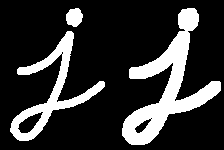

In [89]:
# No 3 - Dilation 5x5 square without OpenCV
dilation_image = dilation(image, square_se_5x5)

final_frame = cv2.hconcat((image, dilation_image))
cv2_imshow(final_frame)

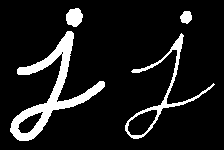

In [90]:
# No 4 - Erotion 5x5 square without OpenCV
erotion_image = erotion(image, square_se_5x5)

final_frame = cv2.hconcat((image, erotion_image))
cv2_imshow(final_frame)

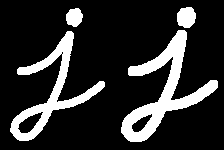

In [91]:
# No 5 - Dilation 5x5 square with OpenCV
dilation_image = dilation_opencv(image, square_se_3x3)

final_frame = cv2.hconcat((image, dilation_image))
cv2_imshow(final_frame)

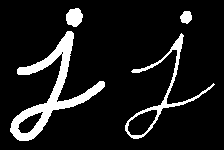

In [92]:
# No 6 - Erotion 5x5 square with OpenCV
erotion_image = erotion_opencv(image, square_se_5x5)

final_frame = cv2.hconcat((image, erotion_image))
cv2_imshow(final_frame)

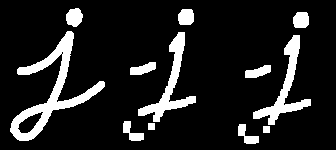

In [93]:
# No 7 - Opening 7x7 square with and without OpenCV

# With OpenCV
opening_image_opencv = opening_opencv(image, square_se_7x7)

# Without OpenCV
opening_image = opening(image, square_se_7x7)

final_frame = cv2.hconcat((image, opening_image_opencv, opening_image))
cv2_imshow(final_frame)

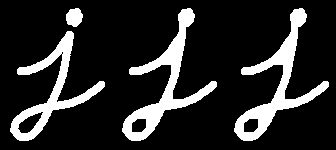

In [94]:
# No 8 - Closing 9x9 square with and without OpenCV

# With OpenCV
closing_image_opencv = closing_opencv(image, square_se_9x9)

# Without OpenCV
closing_image = closing_opencv(image, square_se_9x9)

final_frame = cv2.hconcat((image, closing_image_opencv, closing_image))
cv2_imshow(final_frame)

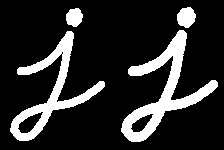

In [95]:
# No 9.1 - Dilation 3x3 cross with OpenCV
dilation_image_opencv = dilation_opencv(image, cross_se_3x3)

final_frame = cv2.hconcat((image, dilation_image_opencv))
cv2_imshow(final_frame)

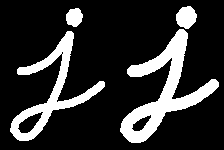

In [96]:
# No 9.2 - Dilation 5x5 cross with OpenCV
dilation_image_opencv = dilation_opencv(image, cross_se_5x5)

final_frame = cv2.hconcat((image, dilation_image_opencv))
cv2_imshow(final_frame)

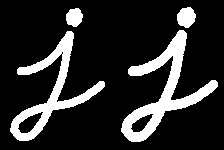

In [97]:
# No 10.1 - Dilation 3x3 circular with OpenCV
dilation_image_opencv = dilation_opencv(image, circle_se_3x3)

final_frame = cv2.hconcat((image, dilation_image_opencv))
cv2_imshow(final_frame)

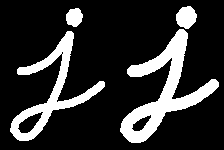

In [98]:
# No 10.2 - Dilation 5x5 circular with OpenCV
dilation_image_opencv = dilation_opencv(image, circle_se_5x5)

final_frame = cv2.hconcat((image, dilation_image_opencv))
cv2_imshow(final_frame)

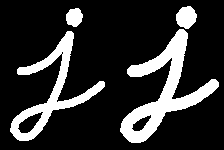

In [99]:
# No 10.2 - Dilation 5x5 circular with OpenCV
dilation_image_opencv = dilation_opencv(image, circle_se_5x5)

final_frame = cv2.hconcat((image, dilation_image_opencv))
cv2_imshow(final_frame)

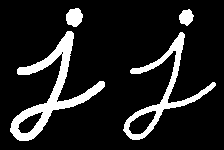

In [100]:
# No 11.1 - Erotion 3x3 rectangle with OpenCV
erotion_image_opencv = erotion_opencv(image, rectangle_se_3x3)

final_frame = cv2.hconcat((image, erotion_image_opencv))
cv2_imshow(final_frame)

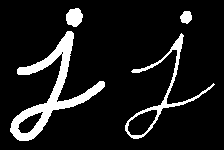

In [101]:
# No 11.2 - Erotion 5x5 rectangle with OpenCV
erotion_image_opencv = erotion_opencv(image, rectangle_se_5x5)

final_frame = cv2.hconcat((image, erotion_image_opencv))
cv2_imshow(final_frame)

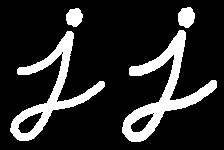

In [102]:
# No 12.1 - Dilation 3x3 vertical line with OpenCV
dilation_image_opencv = dilation_opencv(image, vertical_line_se_3x3)

final_frame = cv2.hconcat((image, dilation_image_opencv))
cv2_imshow(final_frame)

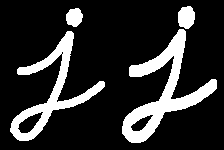

In [103]:
# No 12.2 - Dilation 5x5 vertical line with OpenCV
dilation_image_opencv = dilation_opencv(image, vertical_line_se_5x5)

final_frame = cv2.hconcat((image, dilation_image_opencv))
cv2_imshow(final_frame)